In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from matplotlib import style
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("Features_Variant_3.csv", header = None,index_col= False,
                 names=["Likes","Checkin","PageTheme","PageCategory","Derived5","Derived6","Derived7","Derived8","Derived9","Derived10",
                       "Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17","Derived18","Derived19",
                       "Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
                       "CC1","CC2","CC3","CC4","CC5","BaseTime","PostLength","PostShareCount","PostPromoStatus","HLocal","PostPublishSun",
                        "PostPublishedMon","PostPublishedTue","PostPublishedWed","PostPublishedThu","PostPublishedFri","PostPublishedSat",
                       "BaseDateTimeSun","BaseDateTimeMon","BaseDateTimeTue","BaseDateTimeWed","BaseDateTimeThu","BaseDateTimeFri","BaseDateTimeSat"
                       ,"Target"])

In [3]:
# classifying the target variable
np.mean(df.loc[:,'Target'])

7.103668103519464

In [4]:
freq = df['Target'].value_counts()

In [5]:
freq_sorted = freq.sort_index(axis = 0, ascending = True)

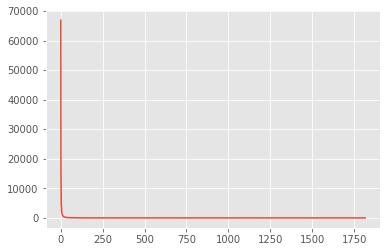

In [31]:
plt.plot(freq_sorted)

In [6]:
# stored in a new variable
df_class = df.copy(deep=True)

In [7]:
# Classifying anything greater than 0 as class positive and less than as class negative
df_class['TargetClass'] = np.where(df['Target'] > 0 , 1, 0)

In [8]:
# Dropping the original Target variable
df_class.drop(['Target'], axis = 1)

,Likes,Checkin,PageTheme,PageCategory,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,PostPublishedFri,PostPublishedSat,BaseDateTimeSun,BaseDateTimeMon,BaseDateTimeTue,BaseDateTimeWed,BaseDateTimeThu,BaseDateTimeFri,BaseDateTimeSat,TargetClass
0,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,1,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,1,0,0,0,0
5,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,1,0,0,0,0,0
6,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,1,0,0,0
7,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,1,0,0,0,0,0,0,0
8,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,1,0,0
9,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,1,0,0,0,0,0,0


In [9]:
# Splitting the data into X
#X = df_class.loc[:,'Likes':'BaseDateTimeSat']
# Selecting 17 features from previous findings

X = df_class.loc[:,['Likes','Checkin','PageTheme','CC1','CC2','CC3','CC4','PostLength','PostShareCount','HLocal','PostPublishSun',
                    'PostPublishedMon','PostPublishedTue','PostPublishedWed','PostPublishedThu','PostPublishedFri','PostPublishedSat',]]
X.head()

,Likes,Checkin,PageTheme,CC1,CC2,CC3,CC4,PostLength,PostShareCount,HLocal,PostPublishSun,PostPublishedMon,PostPublishedTue,PostPublishedWed,PostPublishedThu,PostPublishedFri,PostPublishedSat
0,634995,0,463,0,0,0,0,166,2,24,0,0,0,1,0,0,0
1,634995,0,463,0,0,0,0,132,1,24,0,0,0,0,1,0,0
2,634995,0,463,0,0,0,0,133,2,24,0,0,0,0,0,1,0
3,634995,0,463,7,1,6,7,131,1,24,0,0,0,0,0,1,0
4,634995,0,463,1,0,1,1,142,5,24,0,1,0,0,0,0,0


In [10]:
# Splitting the data into y
y = df_class.loc[:,'TargetClass']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TargetClass, dtype: int32

In [11]:
# Splitting data into train and test using sklearn split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11, test_size = 0.3)

In [12]:
# Creating copy of the train and test variables to scale them
scaled_X_train = X_train.copy(deep=True)
scaled_X_test = X_test.copy(deep=True)

In [13]:
## Since other columns are already one-hot encoded, there was no need to perform scaling on them
scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(scaled_X_train)

In [14]:
# scaling X_test with the X_train parameters
scaled_X_test = scaler.transform(scaled_X_test)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [19]:
pca.fit(scaled_X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
 pca.n_components_

13

In [21]:
scaled_X_train = pca.transform(scaled_X_train)
scaled_X_test = pca.transform(scaled_X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)

from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=scaled_X_train, y=y_train, cv=3)
print(modelAccuracies.mean())

classifierObj.fit(scaled_X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(scaled_X_test)

#Model Accuracy
print(classifierObj.score(scaled_X_test,y_test))

0.7565097715386733


In [23]:
def print_score1(classifier,X_train,y_train,X_test,y_test,train=True):
    mean_train_acc = 0
    mean_valid_acc = 0
    test_acc = 0
    res = 0
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_validate(classifier, X_train, y_train, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
        mean_train_acc = res['train_score'].mean()
        mean_valid_acc = res['test_score'].mean()
        print('Average Accuracy for Train data:\t{0:.4f}\n'.format(res['train_score'].mean()))
        print('Average Accuracy for Validation data :\t{0:.4f}'.format(res['test_score'].mean()))
    elif train == False:
        print("\n\nTest results:\n")
        test_acc = accuracy_score(y_test,classifier.predict(X_test))
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
    return mean_train_acc, mean_valid_acc, test_acc, res

In [24]:
# Create SVM Classifier
clf = SVC(kernel='linear', C= 1)
# Train the model using the training sets
# Takes approximately 10-15 min to execute
clf.fit(scaled_X_train, y_train)
# takes around a minute to execute
y_pred = clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[18653  1584]
 [ 7288  8805]]
              precision    recall  f1-score   support

           0       0.72      0.92      0.81     20237
           1       0.85      0.55      0.66     16093

    accuracy                           0.76     36330
   macro avg       0.78      0.73      0.74     36330
weighted avg       0.78      0.76      0.74     36330

Accuracy: 0.755794109551335


In [25]:
# Cross validation using SVM
def poly_svm(X_train, y_train, C):
    cross_sv = SVC(kernel='poly', degree=C)
    scores = cross_validate(cross_sv, X_train, y_train,cv=3, return_train_score=True)
    return scores

P_score1 = poly_svm(scaled_X_train, y_train, 2)
print(np.mean(P_score1['train_score']))
print(np.mean(P_score1['test_score']))
P_score2 = poly_svm(scaled_X_train, y_train, 3)
print(np.mean(P_score2['train_score']))
print(np.mean(P_score2['test_score']))
P_score3 = poly_svm(scaled_X_train, y_train, 4)
print(np.mean(P_score3['train_score']))
print(np.mean(P_score3['test_score']))

0.65705216824546
0.6562618371147934
0.7516869493580733
0.7483602434255232
0.7619738463198971
0.7563113249121088


In [26]:
rbf_clf = SVC()
rbf_clf.fit(scaled_X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred_1 = rbf_clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred_1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

[[18325  1912]
 [ 6335  9758]]
Accuracy: 0.7729975227085054


In [28]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(scaled_X_train, y_train)


#Making predictions on the Test Set
y_pred_2 = NB.predict(scaled_X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_2))

Accuracy: 0.6536195981282686
